<a href="https://colab.research.google.com/github/ys23-lys/ESAA/blob/main/ESAA_YB_WEEK12_%ED%95%84%EC%82%AC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-평균 알고리즘 이해

**K-평균**: 군집 중심점(centroid)을 선택해 가장 가까운 포인트들을 선택하는 군집화 기법.
- 군집 중심점: 선택된 포인트의 평균 지점으로 이동 -> 이동된 중심점에서 다시 가까운 포인트를 선택 -> 반복 수행(**중심점의 이동이 없을 경우 반복을 멈춤**)

K-평균의 장점
- 일반적인 군집화에서 가장 많이 활용되는 알고리즘
- 알고리즘이 쉽고 간결함

K-평균의 단점
- 거리 기반 알고리즘. 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐(PCA로 차원 감소 적용)
- 반복 획수가 많을 경우 수행 시간 느려짐
- 몇 개의 군집을 선택해야 할지 가이드하기 어려움

### 사이킷런 KMeans 클래스 소개

**KMeans** 초기화 파라미터
- **n_clusters**: 군집화할 개수(=군집 중심점의 개수)
- init: 초기에 군집 중심점의 좌표를 설정할 방식. **k-means++** 방식으로 최초 설정.
- max_iter: 최대 반복 횟수


In [1]:
# class sklearn.cluster.KMeans(n_clusters=8,init='k-means++',n_init=10,max_iter=300,tol=0.0001,
#                             precompute_distances='auto',verbose=0,random_state=None,
#                             copy_x=True,n_jobs=1,algorithm='auto')

### K-평균을 이용한 붓꽃 데이터 세트 군집화

꽃받침과 꽃잎 길이와 너비에 따른 품종을 분류

-> 꽃받침, 꽃잎의 길이에 따라 각 데이터의 군집화 결정

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF=pd.DataFrame(data=iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [4]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [5]:
irisDF['target']=iris.target
irisDF['cluster']=kmeans.labels_
iris_result=irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [6]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)

irisDF['pca_x']=pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


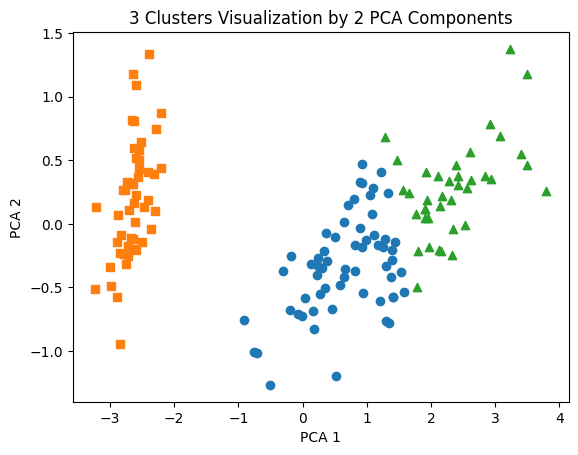

In [7]:
# 군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind=irisDF[irisDF['cluster']==0].index
marker1_ind=irisDF[irisDF['cluster']==1].index
marker2_ind=irisDF[irisDF['cluster']==2].index

# 군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y값 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'],y=irisDF.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'],y=irisDF.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'],y=irisDF.loc[marker2_ind,'pca_y'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

### 군집화 알고리즘 테스트를 위한 데이터 생성

군집화용 데이터 생성기: make_blobs(), make_classification()
- make_blobs: 개별 군집의 중심점과 표준 편차 제어 기능 有
- make_classification: 노이즈를 포함한 데이터를 만드는 데 유용

**make_blobs()** 호출 파라미터
- n_samples: 생성할 총 데이터 개수
- n_features: 데이터의 피처 개수
- centers: int값으로 설정하면 군집의 개수, ndarray형태로 표현할 경우 개별 군집 중심점의 좌표
- cluster_std: 생성될 군집 데이터의 표준 편차(군집별로 서로 다른 표준 편차를 가진 데이터를 만들 때 사용)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.8,random_state=0)
print(X.shape,y.shape)

# y target 값의 분포를 확인
unique,counts=np.unique(y,return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [9]:
import pandas as pd

clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


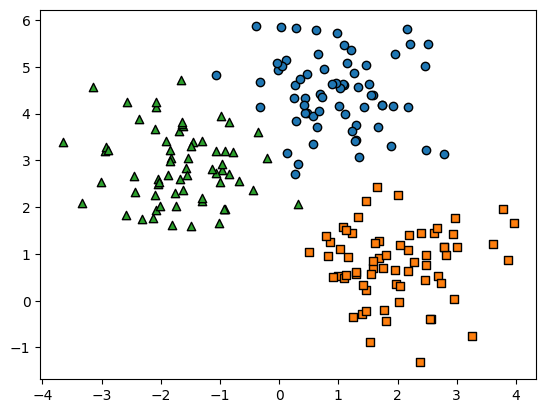

In [10]:
target_list=np.unique(y)
# 각 타깃별 산점도의 마커 값
markers=['o','s','^','P','D','H','x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2로 scatter plot을 marker별로 생성
for target in target_list:
  target_cluster=clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'],y=target_cluster['ftr2'],edgecolor='k',
              marker=markers[target])
plt.show()

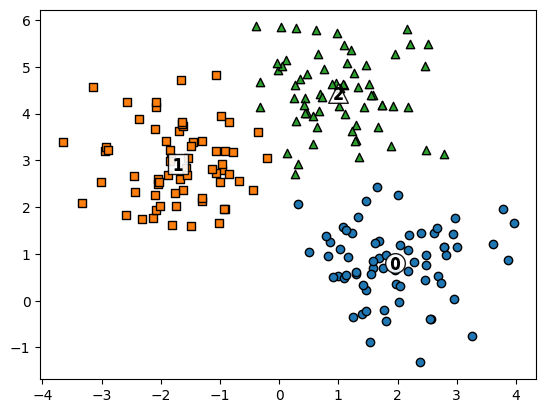

In [11]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=200,random_state=0)
cluster_labels=kmeans.fit_predict(X)
clusterDF['kmeans_label']=cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers=kmeans.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','P','D','H','x']

# 군집된 label 유형별로 iteration하면서 marker 별로 scatter plot 수행
for label in unique_labels:
  label_cluster=clusterDF[clusterDF['kmeans_label']==label]
  center_x_y=centers[label]
  plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',
              marker=markers[label])

  # 군집별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='white',
              alpha=0.9,edgecolor='k',marker=markers[label])
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',edgecolor='k',
              marker='$%d$' % label)

plt.show()

In [12]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


cluster_std가 작을수록 군집 중심에 데이터가 모여 있고, 클수록 데이터가 퍼져 있음.

## 군집 평가(Cluster Evaluation)

### 실루엣 분석의 개요

실루엣 분석: 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지를 나타냄.(=다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 가깝게 뭉쳐 있음.)
- **실루엣 계수**(silhouette coefficient): 개별 데이터가 가지는 군집화 지표. 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화되어 있고, 다른 군집 데이터와 얼마나 멀리 분리되어 있는가를 나타내는 지표.
   - s(i)=(b(i)-a(i))/Max(a(i), b(i))
      - a(i): 같은 군집 내 다른 데이터 포인트와의 거리를 평균한 값
      - b(i): 다른 군집 중 가장 가까운 군집과의 평균 거리
   - -1~1의 가지며, 1로 가까워질수록 근처 군집과 더 멀리 떨어져 있음. 0에 가까울수록 근처 군집과 가까워짐.

sklearn.metrics.silhouette_samples(X,labels,metric='euclidean',**kwds): 각 데이터 포인트의 실루엣 계수를 계산해 반환

sklearn.metrics.silhouette_score(X,labels,metric='euclidean',sample_size=None,**kwds): 전체 데이터의 실루엣 계수 값을 평균해 반환

좋은 군집화의 조건
1. 전체 실루엣 계수의 평균값(silhouette_score()값)이 0~1 사이의 값을 가지며 1에 가까울수록 좋음
2. 전체 실루엣 계수의 평균값과 개별 군집의 평균값의 편차가 크지 않아야 함

### 붓꽃 데이터 세트를 이용한 군집 평가

In [13]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(data=iris.data,columns=feature_names)
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(irisDF)
irisDF['cluster']=kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples=silhouette_samples(iris.data,irisDF['cluster'])
print('silhouette_samples() return 값의 shape',score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff']=score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score=silhouette_score(iris.data,irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


In [14]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.422323
1,0.797604
2,0.436842


### 군집별 평균 실루엣 개수의 시각화를 통한 군집 개수 최적화 방법

In [15]:
# visualize_silhouette([2,3,4,5],X_features)

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def visualize_silhouette(cluster_list, X):
    from matplotlib import pyplot as plt

    for n_clusters in cluster_list:
        fig, ax1 = plt.subplots(1)
        fig.set_size_inches(6, 4)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        kmeans = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = kmeans.fit_predict(X)

        silhouette_vals = silhouette_samples(X, cluster_labels)
        silhouette_avg = silhouette_score(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_silhouette_vals = silhouette_vals[cluster_labels == i]
            ith_silhouette_vals.sort()

            size_cluster_i = ith_silhouette_vals.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_silhouette_vals,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_title(f"Silhouette plot for {n_clusters} clusters")
        ax1.set_xlabel("Silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        plt.tight_layout()
        plt.show()

1. 군집 개수 2개

평균 실루엣 계수는 높으나 0번 군집의 경우 내부 데이터끼리 많이 떨어져 있는 형태.

2. 군집 개수 3개

0번 군집의 경우 내부 데이터 간 거리도 멀지만 2번 군집과 가깝게 위치하고 있는 형태.

3. 군집 개수 4개 <- 최적

평균 실루엣 계수 값이 비교적 균일.

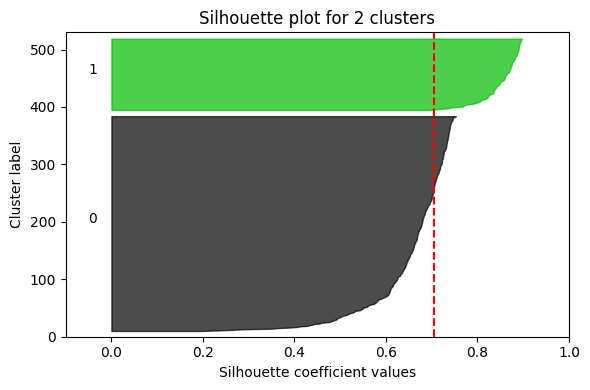

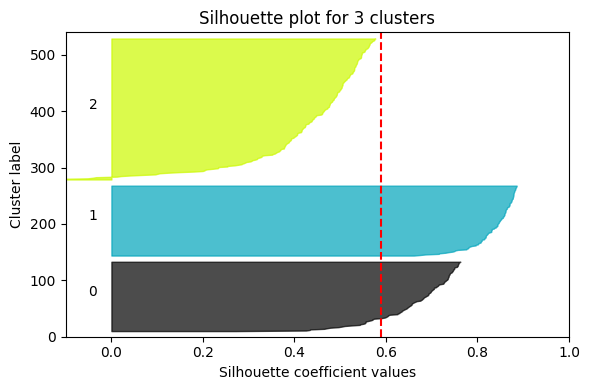

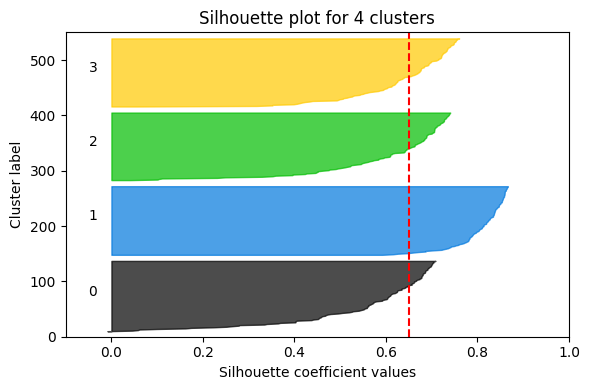

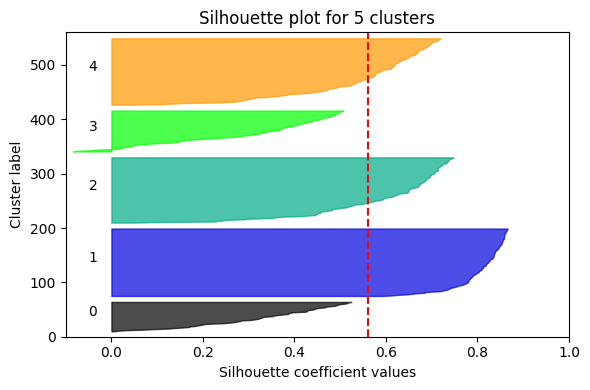

In [17]:
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=500,n_features=2,centers=4,cluster_std=1,
               center_box=(-10.0,10.0),shuffle=True,random_state=1)
# 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5],X)

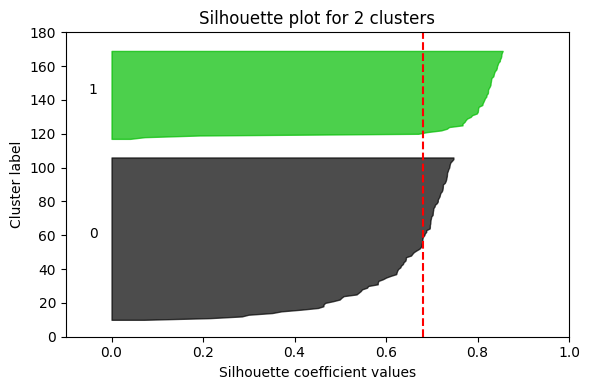

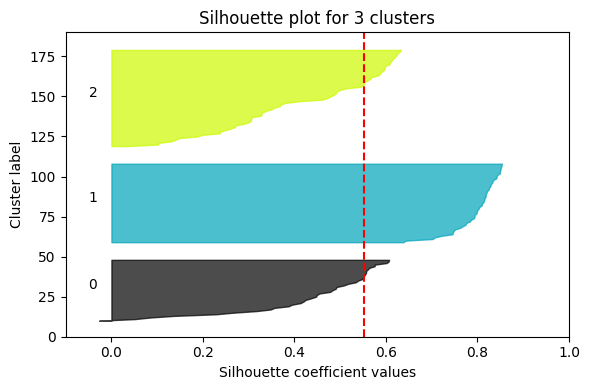

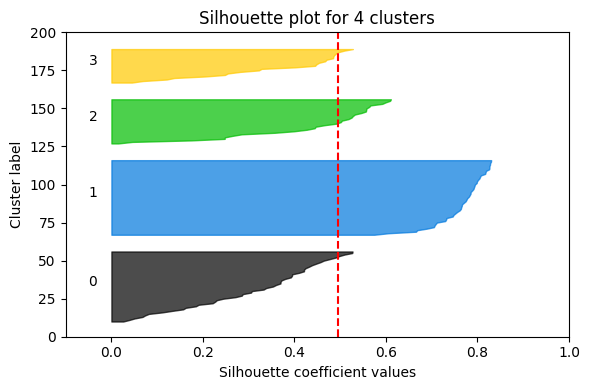

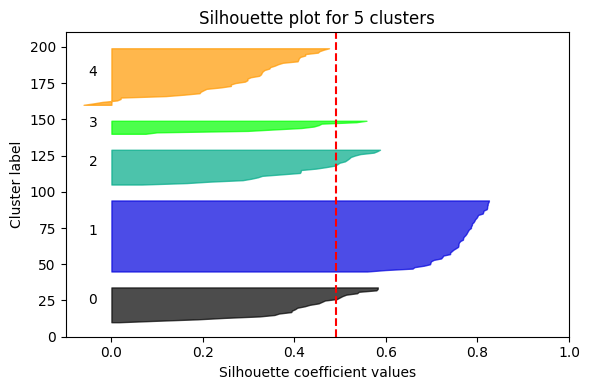

In [18]:
from sklearn.datasets import load_digits
iris=load_iris()
visualize_silhouette([2,3,4,5],iris.data)